In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
datadir = Path("../data/")
GLMtrainfile = datadir / "Modeling_Data"/ "traindata_GLM.csv"
pGLMtestfile = datadir / "Modeling_Data"/ "testdata_pres_GLM.csv"
fGLMtestfile = datadir / "Modeling_Data"/ "testdata_GLM.csv"
SGLMtrainfile = datadir / "Modeling_Data"/ "traindata_SGLM.csv"
pSGLMtestfile = datadir / "Modeling_Data"/ "testdata_pres_SGLM.csv"
fSGLMtestfile= datadir / "Modeling_Data"/ "testdata_SGLM.csv"

In [3]:
GLMtrain = pd.read_csv(GLMtrainfile, sep=",")
pGLMtest = pd.read_csv(pGLMtestfile, sep=",")
fGLMtest = pd.read_csv(fGLMtestfile, sep=",")
SGLMtrain = pd.read_csv(SGLMtrainfile, sep=",")
pSGLMtest = pd.read_csv(pSGLMtestfile, sep=",")
fSGLMtest = pd.read_csv(fSGLMtestfile, sep=",")

In [4]:
pGLMtest = pGLMtest[~pGLMtest["HID"].isin(GLMtrain["HID"])]
pSGLMtest = pSGLMtest[~pSGLMtest["HID"].isin(SGLMtrain["HID"])]

In [5]:
tr_common_features = ["ID_IDW1N10", "BIO14_Mean", "BIO18_Mean", "CWD_IDW1N10", "RX1DAY_IDW1N10", "WSDI_IDW1N10", "PA", "Folds"]
ts_common_features = ["ID_IDW1N10", "BIO14_Mean", "BIO18_Mean", "CWD_IDW1N10", "RX1DAY_IDW1N10", "WSDI_IDW1N10"]


In [6]:
train = GLMtrain.merge(SGLMtrain.drop(tr_common_features, axis=1))

In [7]:
ptest = pGLMtest.merge(pSGLMtest.drop(ts_common_features, axis=1))

In [8]:
ftest = fGLMtest.merge(fSGLMtest.drop(ts_common_features, axis=1))

In [9]:
feature_list = ["TN10P_IDW1N10", "RX1DAY_IDW1N10", "WSDI_IDW1N10", "TN90P_IDW1N10"]
subplot_titles = {"TN10P_IDW1N10":"TN10P", "RX1DAY_IDW1N10":"RX1DAY", "WSDI_IDW1N10":"WSDI", "TN90P_IDW1N10":"TN90P"}

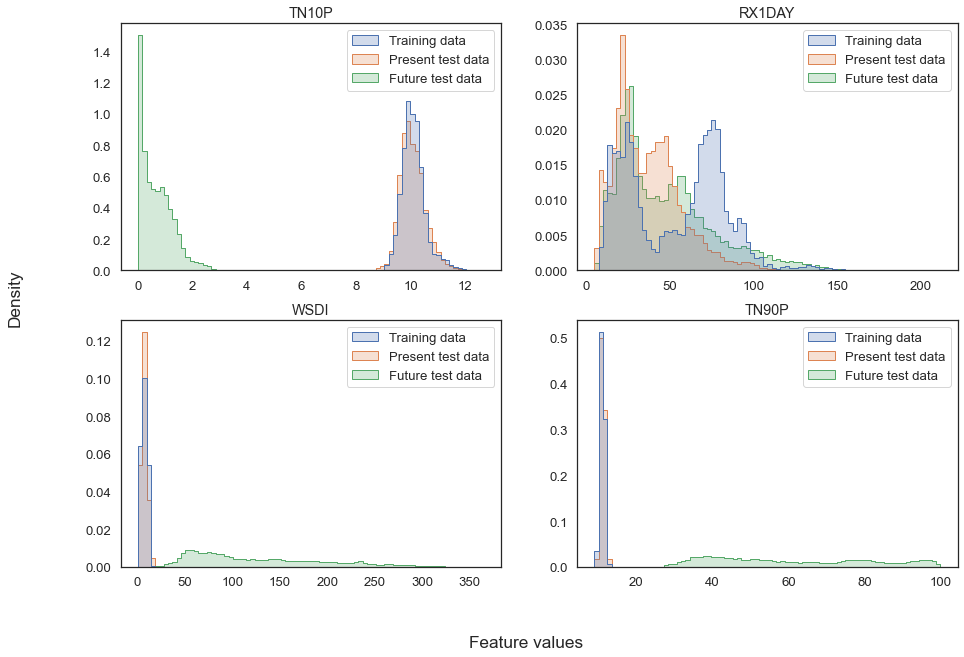

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10),sharey=False)

sns.set_style('white')
sns.set(font_scale=1.2)
sns.set_style('white')
fig.supxlabel('Feature values')
fig.supylabel('Density')


for idx,ax in zip(feature_list, axes.flat):
    sns.histplot(ax=ax,data={"Training data": train[idx], "Present test data": ptest[idx], "Future test data": ftest[idx]}, 
                 element="step", stat="density", common_norm=False, bins=80).set(ylabel=None)
    ax.set_title(subplot_titles[idx])

fig.savefig("test.png")